In [6]:
import numpy as np 
from scipy.integrate import odeint
import pylab as plt
import seaborn as sns

In [7]:
def harmonic_oscillator(y,t):
    ω = 1
    γ = 0.2
    dqdt = y[1]
    dpdt = -y[0]*ω**2-γ*y[1]
    return dqdt, dpdt

In [8]:
t = np.linspace(0,100,1000)
q0 = 1
p0 = 1
time_interval = (0,10)
start_conditions = (q0,p0)

In [9]:
integration = odeint(func = harmonic_oscillator,
                        t = t,
#                        dense_output = True,
                        y0 = start_conditions,)

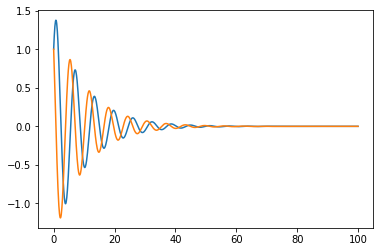

In [10]:
plt.plot(t,integration)

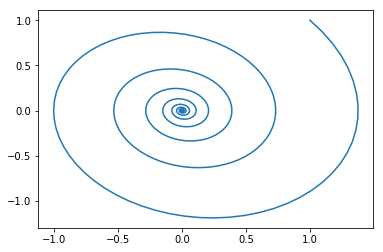

In [11]:
plt.plot(integration.T[0],integration.T[1]) #phase space

In [12]:
import math as ma 
def pendulum(y,t, m,g):
    dθdt = y[1]
    dωdt = m*g*ma.cos(y[0])
    return dθdt,dωdt

In [13]:
m = 0.05
g = 9.81
θ0 = ma.pi/3.5
ω0 = 0
initial_condition = [θ0, ω0]

In [14]:
sol = odeint(func = pendulum,
             y0 = initial_condition,
             t = t, 
             args = (m,g))

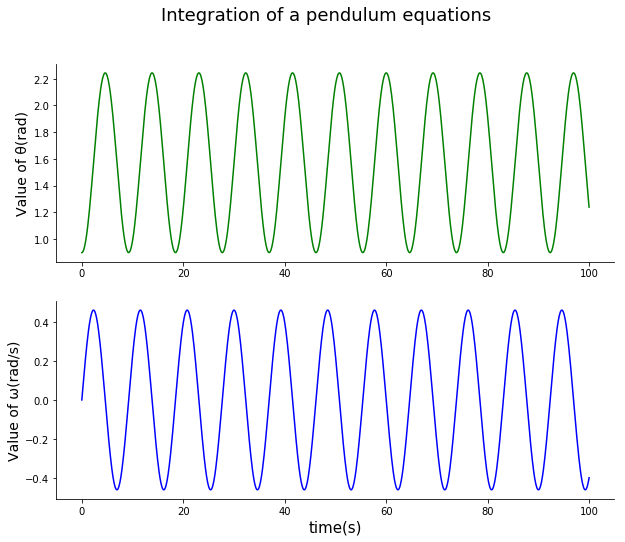

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (10,8))
fig.suptitle("Integration of a pendulum equations",size = 18)

ax1.plot(t, sol.T[0], label = "θ", color = "g")
ax1.set_ylabel("Value of θ(rad)", size = 14)

ax2.plot(t, sol.T[1], label = "ω",color = "b")
ax2.set_xlabel("time(s)",size = 15)
ax2.set_ylabel("Value of ω(rad/s)", size = 14)

sns.despine()
plt.show()

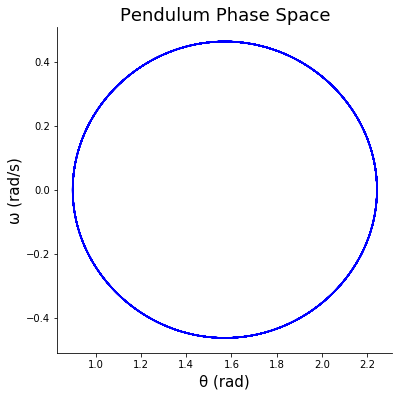

In [16]:
#now plotting the phase space.

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.plot(sol.T[0],sol.T[1], color = "b")
ax.set_xlabel("θ (rad)", size = 15)
ax.set_ylabel("ω (rad/s)", size = 15)
ax.set_title("Pendulum Phase Space", size = 18)
sns.despine()

In [17]:
#Now trying to integrate over different initial conditions for θ

θ0 = np.linspace(0,ma.pi/2,45)
ω0 = 0
solus = []

for θ0_ in θ0:
    initial_conditions = (θ0_,ω0)
    sol = odeint(func = pendulum,
             y0 = initial_conditions,
             t = t, 
             args = (m,g))
    solus.append(sol)

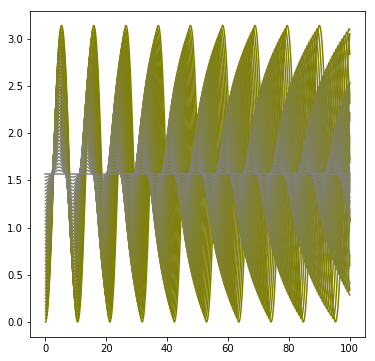

In [18]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
for sol in solus:
    ax.plot(t,sol.T[0], color = (0.5,0.5,sol.T[0][0]/ma.pi))
    
    #not really beautyful

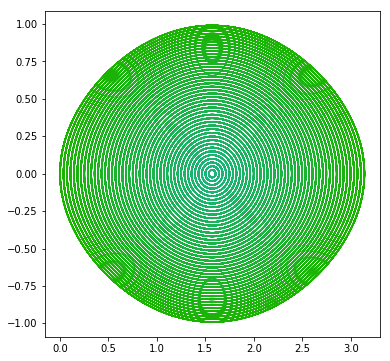

In [19]:
#now trying with phase space 

fig, ax = plt.subplots(1,1,figsize=(6,6))
for sol in solus:
    ax.plot(sol.T[0],sol.T[1],color = (0.1,0.7,sol.T[0][0]/ma.pi))

In [20]:
#Now same thing with omega, but with some dissipation

def pendulum(y,t, m,g):
    dθdt = y[1]
    dωdt = m*g*ma.cos(y[0]) - γ*y[1]
    return dθdt,dωdt

γ = 0.1
ω0 = np.linspace(0,5,50)
θ0 = 0
solus = []

for ω0_ in ω0:
    initial_conditions = (θ0,ω0_)
    sol = odeint(func = pendulum,
             y0 = initial_conditions,
             t = t, 
             args = (m,g))
    solus.append(sol)

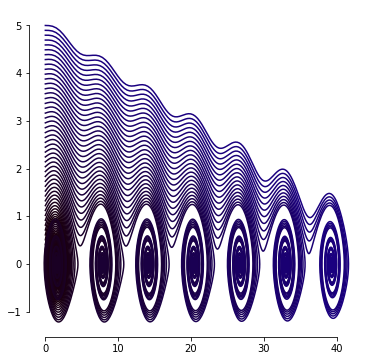

In [21]:
fig, ax = plt.subplots(1,1,figsize=(6,6))
for sol in solus:
    ax.plot(sol.T[0],sol.T[1],color = (0.1,sol.T[0][0]/max(sol.T[0]),sol.T[1][0]/10))

sns.despine(trim = True)
#nice 